<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/air.png?raw=true" width=800 align="left"/>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 **무작정** 코딩을 진행해봅니다.
- AirQuality 데이터를 대상으로 모델링 해서 오존 농도를 예측해 봅니다.
- LinearRegression 알고리즘을 사용합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [3]:
# 상위 몇 개 행 확인
data.head(5)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


In [4]:
# 하위 몇 개 행 확인
data.tail()

,Ozone,Solar.R,Wind,Temp,Month,Day
148,30,193.0,6.9,70,9,26
149,23,145.0,13.2,77,9,27
150,14,191.0,14.3,75,9,28
151,18,131.0,8.0,76,9,29
152,20,223.0,11.5,68,9,30


In [5]:
# 변수 확인
data.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [6]:
# 기초통계량 확인
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.052288,185.931507,9.957516,77.882353,6.993464,15.803922
std,30.156127,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,20.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,34.000000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,59.000000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [7]:
# 상관관계 확인
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


<AxesSubplot:>

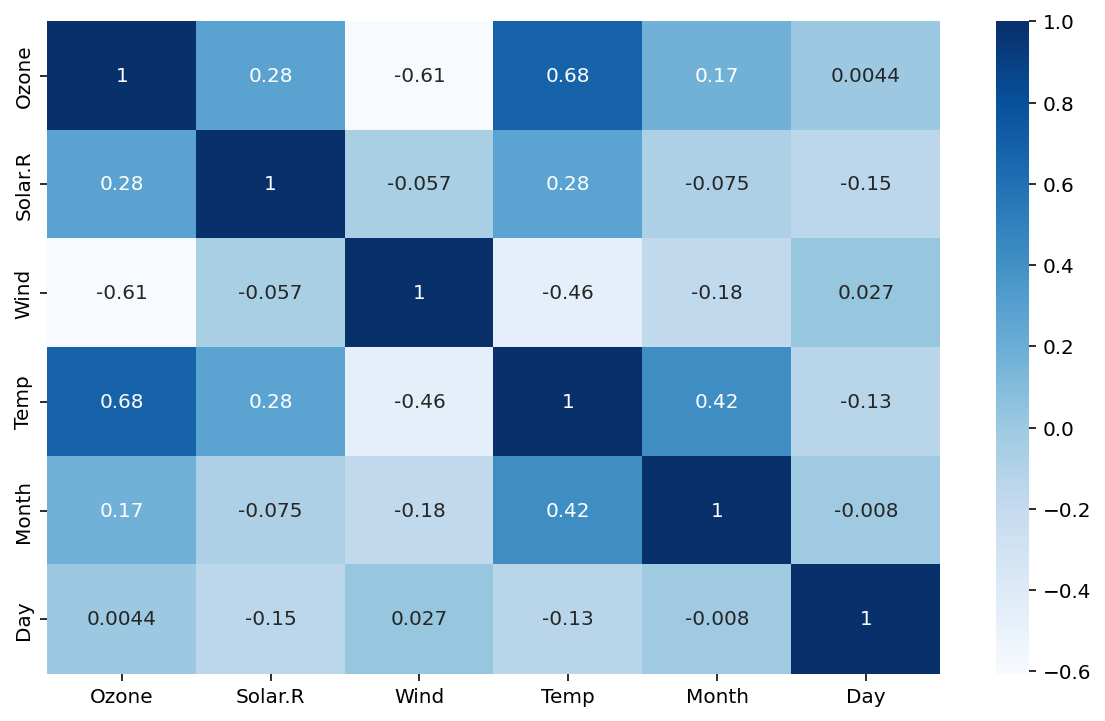

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

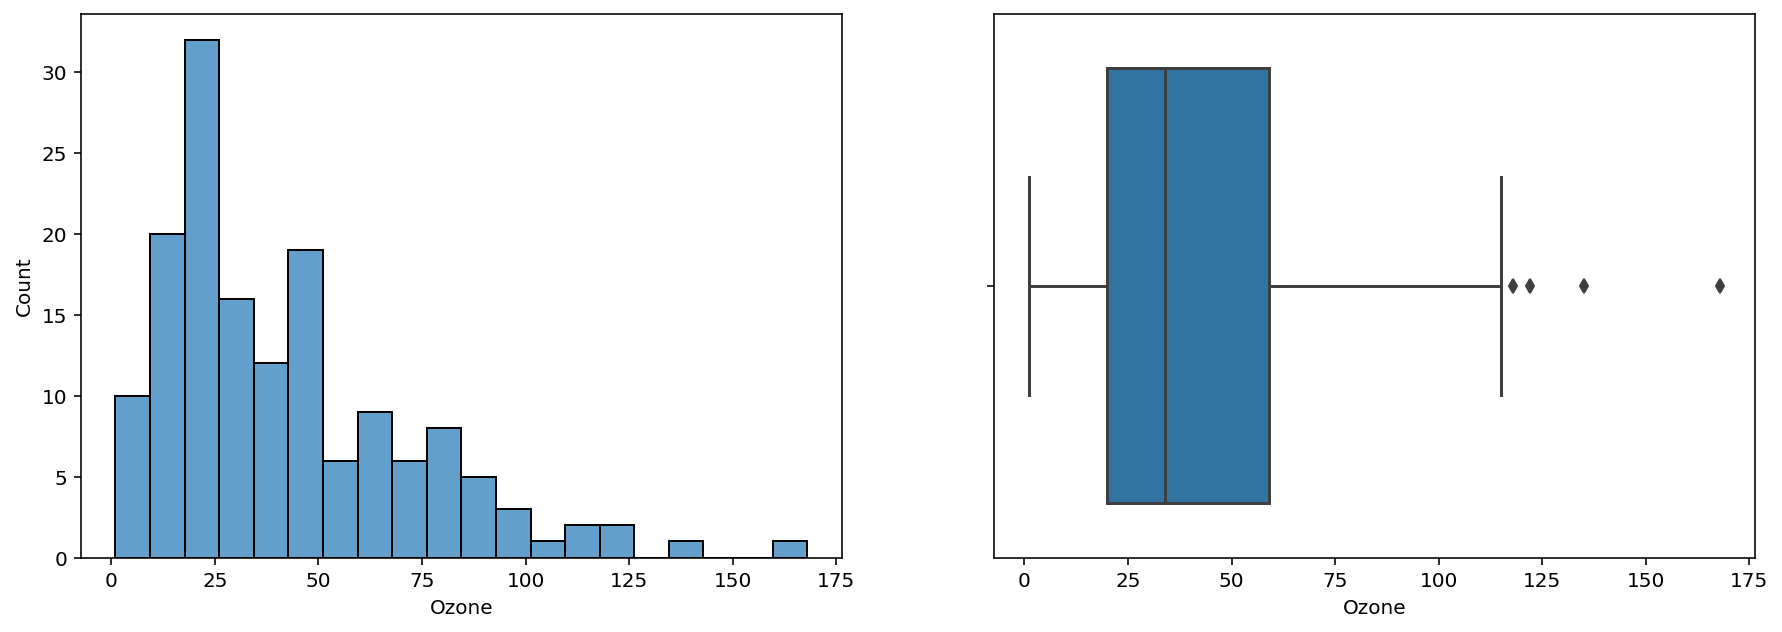

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data['Ozone'], bins=20, alpha=0.7, ec='Black')

plt.subplot(1,2,2)
sns.boxplot(data['Ozone'], dodge=False)
plt.show()

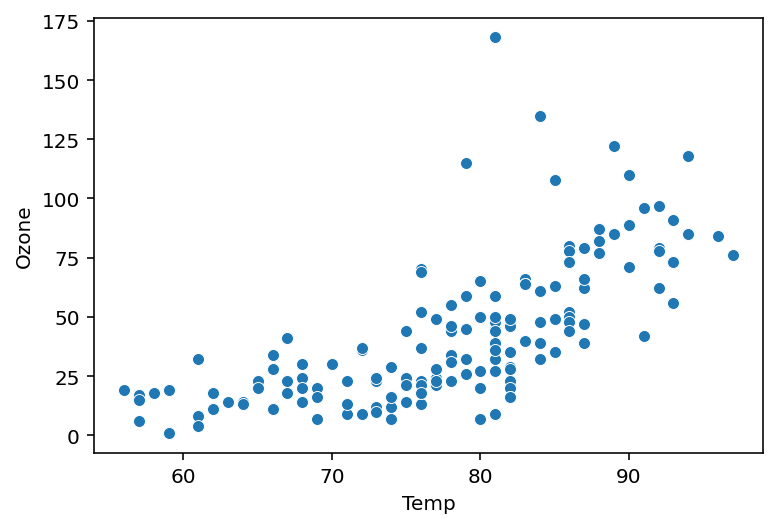

In [10]:
sns.scatterplot(data['Temp'],data['Ozone'])
plt.show()

<AxesSubplot:xlabel='Month', ylabel='Ozone'>

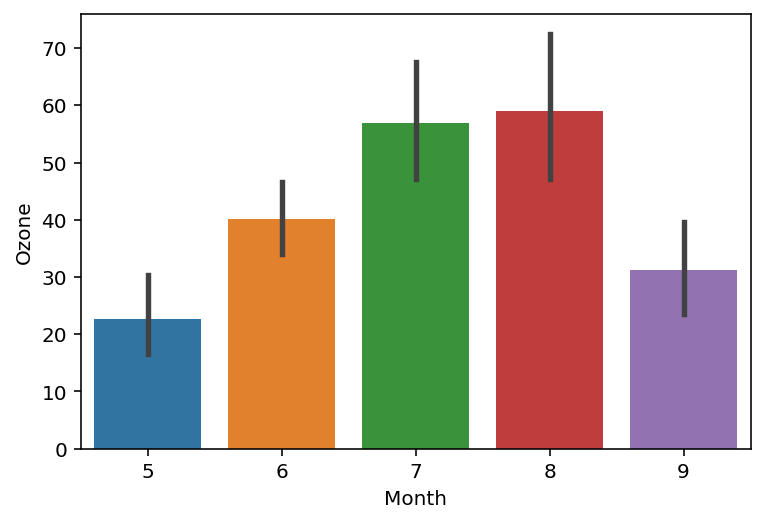

In [11]:
sns.barplot(data['Month'],data['Ozone'])

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) 결측치 처리**

- 결측치가 있으면 제거하거나 적절한 값으로 채웁니다.

In [12]:
# 결측치 확인
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [13]:
# 전날 값으로 결측치 채우기
data['Solar.R'].fillna(method='bfill',inplace=True)

# 확인
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 변수 제거**

- 분석에 의미가 없다고 판단되는 변수는 제거합니다.

In [14]:
# 변수 제거
# day 
d_columns = ['Day']
data.drop(columns=d_columns,inplace=True)

# 확인
data.head()

,Ozone,Solar.R,Wind,Temp,Month
0,41,190.0,7.4,67,5
1,36,118.0,8.0,72,5
2,12,149.0,12.6,74,5
3,18,313.0,11.5,62,5
4,19,299.0,14.3,56,5


**3) x, y 분리**

- target 변수를 명확히 지정합니다.
- target을 제외한 변수를 x 데이터프레임으로 선언합니다.
- y 데이터프레임은 target 변수만을 가집니다.

In [15]:
# target 확인
target = 'Ozone'

# 데이터 분리
X = data.drop(target,axis=1)
y = data[target]

In [16]:
X.shape

(153, 4)

In [17]:
# y는 데이터프레임이 아님. 즉 칼럼이 없다. (153,1)이 아닌 이유. 칼럼값이 아닌 그냥 데이터값만 존재한다고 보면 됨. 
y.shape

(153,)

**4) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [18]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split


# 7:3으로 분리
# train_test_split(X,y,test_size=0.3)  ---> 찍어보면 리스트로 나옴. 앞에서 받아줄 변수들 설정해주면됨. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2022) # 나눠질때 결과가 같도록 random_state값을 넣어줌. 같은 숫자를 넣으면 분리된 결과가 같음!

In [19]:
# train_test_split(X,y,test_size=0.3)

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

**1) 모델링**

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘과 평가 방법을 사용합니다.
    - 알고리즘: LinearRegression
    - 평가방법: mean_absolute_error

In [20]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression # 모델용(알고리즘)
from sklearn.metrics import mean_absolute_error # 평가용(평가지표)   평가지표는 모두 metrics에서 찾으면됨. 

In [21]:
# 2단계: 선언하기
model = LinearRegression()

In [22]:
# 3단계: 학습하기
model.fit(X_train,y_train)

LinearRegression()

In [23]:
# 4단계: 예측하기
y_pred = model.predict(X_test)
y_pred

array([ 51.82323087,  32.21172449,  69.33133277,  81.24744627,
        49.78362721,  66.27396299,  24.48529461,  57.28418617,
       -22.10990448, -20.11359674,  56.61867337,  79.42888231,
        27.55513922,  32.00305232,  38.83163338,  21.43411854,
        81.01548339,  30.17503497,  48.88120748,  13.81430897,
        47.52003649,  29.54873231,  55.6480167 ,  26.79735155,
        37.54311647,  48.7333023 ,  60.2907228 ,  66.99516119,
        71.58783263,  66.48012   ,  16.47394658,  55.72104393,
        12.09571015,  78.67527908,  15.92864236,  38.29735871,
        41.91552126,   6.56323524,  35.08410792,  55.72728411,
        46.81579662,  21.23979735,  77.17912984,  26.42548607,
        50.68499604,  31.7970349 ])

In [24]:
# 5단계: 평가하기
# 평균 14정도의 오차가 있는것으로 확인됨. 
mean_absolute_error(y_test,y_pred)

13.353675986459297

In [25]:
y_test[:10].values

array([71, 26, 76, 84, 40, 79, 44, 89,  8,  6], dtype=int64)

In [26]:
y_pred[:10]

array([ 51.82323087,  32.21172449,  69.33133277,  81.24744627,
        49.78362721,  66.27396299,  24.48529461,  57.28418617,
       -22.10990448, -20.11359674])

##### 2) 결과 시각화 

In [32]:
ytest_mean = y_test.mean()

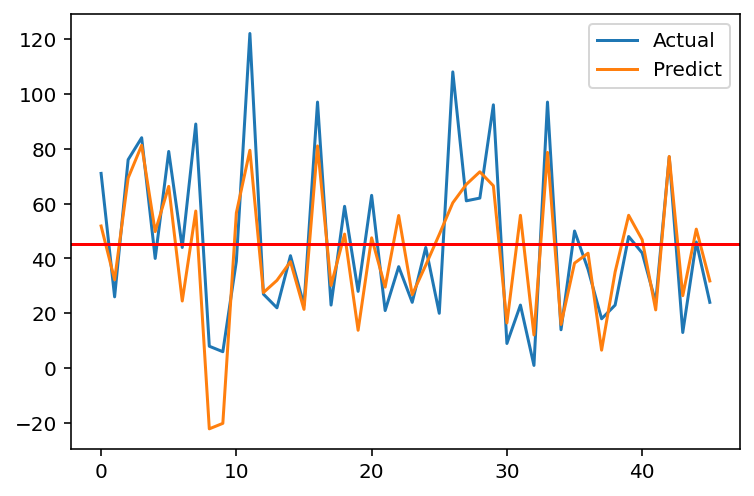

In [34]:
# y_test는 시리즈형태이므로 values로 값만 넣어줘야 함. 
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predict')
plt.legend()
plt.axhline(ytest_mean, color='r')
plt.show()